# Evaluate AO3 fanwork archive database
This notebook shows a basic review of fanwork database charactersitics, interpreting a database collected with the ao3.py query scraper functions.

In [1]:
# import specialised functions from ao3.py file
%load_ext autoreload
%autoreload 1
%aimport ao3

In [2]:
# necessary libraries. One day I will use beautiful soup.
import os
import time
import datetime
import string
import math
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from time import strptime
import ast

In [3]:
os.chdir('/Users/finn/dev/Ao3mine/data')
os.listdir('.')

['Sherlock (TV)_monthly_kudos_median_AO3.png',
 'BTS G Fluff_daily_Works_AO3.png',
 'Sherlock (TV)_Annual_CreatorWaves_MonthlyActive_AO3.png',
 'BTS G Fluff_monthly_Hits_median_AO3.png',
 '.DS_Store',
 'Sherlock (TV)_monthly_Hits_median_AO3.png',
 'BTS_G_Fluff_2021-01-01_ao3DB.db',
 'BTS G Fluff_monthly_Hits_AO3.png',
 'Sherlock_TV_2020-12-27_ao3DB.db',
 'BTS G Fluff_monthly_works_AO3.png',
 'test_test_ronnie_2020-12-27_ao3DB.db',
 'BTS G Fluff_monthly_kudos_median_AO3.png',
 'Sherlock (TV)_monthly_Hits_AO3.png',
 'BTS G Fluff_Annual_CreatorWaves_MonthlyActive_AO3.png',
 'BTS G Fluff_monthly_kudos_AO3.png',
 'BTS_G_Fluff_2020-12-31_ao3DB.db',
 'test_Sherlock_TV_2020-12-27_ao3DB.db',
 'test_ronnie_2020-12-26_ao3DB.db',
 'test_ronnie_2020-12-27_ao3DB.db',
 'BTS G Fluff_monthly_words_AO3.png',
 'Sherlock (TV)_monthly_words_AO3.png',
 'test_test_Sherlock_TV_2020-12-27_2020-12-29_ao3DB.db',
 'Sherlock (TV)_daily_Works_AO3.png',
 'Sherlock (TV)_monthly_kudos_AO3.png']

The extraction of the database to a useable pandas dataframe with mixes objects takes a little bit of time. A special function converts the list strings into lists again for more conveninent analysis. However, this requires iterating over the entries in stringified fields. 

It takes about 6 seconds for 2500 entries, 2 minutes for 50 000. 

In [5]:
os.chdir('/Users/finn/dev/Ao3mine/data')
#sqlName = 'BTS_G_Fluff_2021-01-01_ao3DB.db'
sqlName = 'Sherlock_TV_2020-12-27_ao3DB.db'

tic = time.time()
df_DB = ao3.ao3_sql_2_db(sqlName)
print(time.time()-tic)
print(len(df_DB))

289.84848737716675
117317


In [6]:
# DB_name = 'BTS G Fluff'
DB_name = 'Sherlock (TV)'
df_DB

,Bookmarks,Category,Chapters,Character_tags,Collection,Comments,Complete,Creator,Date,Fandom,...,Series,Series_part,Summary,Tags,Title,Warning,Words,cURL,sURL,url
0,0,[F/M],"[1, 1]","[Sherlock Holmes, Molly Hooper, Mrs. Hudson (S...",1,0,Complete Work,[GoodShipSherlollipop],2020-12-27 00:00:00,"[Sherlock (TV), Sherlock Holmes & Related Fand...",...,[Journey],[19],With the guidelines allowing three households ...,"[Sherlock Holmes/Molly Hooper, Sherlock Holmes...",Christmas Plans during a Pandemic,[No Archive Warnings Apply],4705,[https://archiveofourown.org/users/GoodShipShe...,[https://archiveofourown.org/series/1470725],https://archiveofourown.org/works/28364874
1,0,[F/M],"[1, 1]","[Sherlock Holmes, Molly Hooper, John Watson, M...",0,0,Complete Work,[darthsydious],2020-12-27 00:00:00,[Sherlock (TV)],...,[],[],Following the second world war in a small vill...,"[Sherlock Holmes/Molly Hooper, John Watson/Mar...",The Green Rushes,[No Archive Warnings Apply],4077,[https://archiveofourown.org/users/darthsydiou...,[],https://archiveofourown.org/works/28364871
2,0,[M/M],"[1, 1]","[Sherlock Holmes, John Watson, Mycroft Holmes,...",0,0,Complete Work,[fantasybean],2020-12-27 00:00:00,"[Sherlock (TV), Sherlock Holmes & Related Fand...",...,[12 Days of Sherlockmas!],[10],Sherlock and John get caught under the mistlet...,"[Sherlock Holmes/John Watson, Sherlock Holmes,...",Day 10: Underneath the Mistletoe,[No Archive Warnings Apply],1249,[https://archiveofourown.org/users/fantasybean...,[https://archiveofourown.org/series/2036677],https://archiveofourown.org/works/28364676
3,0,[Other],"[20, ?]","[Mycroft Holmes, Sherlock Holmes, John Watson,...",0,0,Work in Progress,[coopercroft],2020-12-27 00:00:00,"[Sherlock Holmes & Related Fandoms, Sherlock (...",...,[],[],Dopo una vita spesa per il lavoro e a proteg...,"[Mycroft Holmes, Sherlock Holmes, John Watson,...",La mia ultima richiesta : No flowers,[Choose Not To Use Archive Warnings],26976,[https://archiveofourown.org/users/coopercroft...,[],https://archiveofourown.org/works/27510598
4,0,[F/M],"[1, 1]","[Sherlock Holmes, John Watson, Rosamund Mary ""...",0,0,Complete Work,[WritePlaceWriteTime],2020-12-27 00:00:00,"[Sherlock Holmes & Related Fandoms, Sherlock (...",...,[221B Finder's Keeper's],[2],"With the help of John and Rosie, Sherlock find...","[Sherlock Holmes/Molly Hooper, John Watson/Mar...",Found It,[No Archive Warnings Apply],2176,[https://archiveofourown.org/users/WritePlaceW...,[https://archiveofourown.org/series/2076162],https://archiveofourown.org/works/28364208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117312,53,[M/M],"[1, 1]","[Sherlock Holmes, John Watson, Mycroft Holmes]",0,13,Complete Work,[beren],2010-08-03 00:00:00,[Sherlock (TV)],...,[Needs],[1],"When Sherlock is shot and lies dying, John con...","[Sherlock Holmes/John Watson, Sherlock Holmes,...",The Needs of the Few,[No Archive Warnings Apply],5149,[https://archiveofourown.org/users/beren/pseud...,[https://archiveofourown.org/series/4262],https://archiveofourown.org/works/104956
117313,2,[Gen],"[1, 1]","[Sherlock Holmes, John Watson]",0,4,Complete Work,[orphan_account],2010-08-03 00:00:00,[Sherlock (TV)],...,[],[],A sarcastic little thing written for the promp...,"[Sherlock Holmes, John Watson, Illnesses, h/c,...",take me to bed,[Choose Not To Use Archive Warnings],222,[https://archiveofourown.org/users/orphan_acco...,[],https://archiveofourown.org/works/104965
117314,28,[M/M],"[1, 1]",[],0,20,Complete Work,[ariadnes_string],2010-08-03 00:00:00,[Sherlock (TV)],...,[],[],"""Well,"" Sherlock said, ""you can ask me to do a...",[Sherlock Holmes/John Watson],"""and the heat goes on….(where the hand has been)""",[No Archive Warnings Apply],1358,[https://archiveofourown.org/users/ariadnes_st...,[],https://archiveofourown.org/works/105129
117315,6,[No category],"[1, 1]","[Sherlock Holmes, John Watson]",0,3,Complete Work,[liispier],2010-08-04 00:00:00,[Sherlock (TV)],...,[],[],John f

In [7]:
df_DB.loc[0,'Tags'][1] # test the listification of tags

'Sherlock Holmes & Molly Hooper'

# Basic analysis
a few calculations on the statistics of the collected metadata

In [8]:
# the number of unique creators
flatCreatorList = ao3.flatten(list(df_DB['Creator'].values))
Cs = pd.Series(data=flatCreatorList).value_counts()
print('Total number of creators of ' + DB_name + ': ' + str(len(Cs)))
Cs

Total number of creators of Sherlock (TV): 24132


orphan_account          3755
afteriwake              1295
notjustmom               950
MizJoely                 620
janto321 (FaceofMer)     481
                        ... 
Lilywheat                  1
Mycatissnoring             1
Slayer87                   1
Atsvie                     1
fangirlsplosion            1
Length: 24132, dtype: int64

In [12]:
# consider only complete works to reduce WIP effects
df_set = df_DB.loc[df_DB['Complete']=='Complete Work']
#df_set = df_set.loc[df_set['Date']> months[0]]
len(df_set)

102598

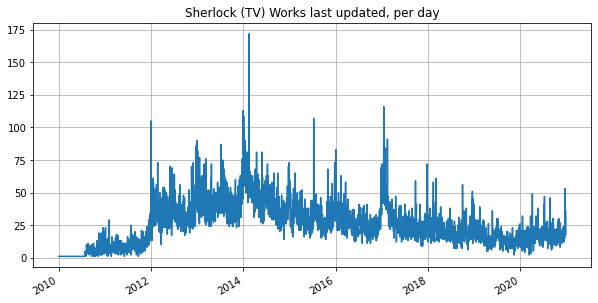

,Works
2010-01-02,1
2010-01-18,1
2010-07-27,1
2010-07-28,1
2010-08-01,5
...,...
2020-12-23,36
2020-12-24,35
2020-12-25,28
2020-12-26,19


In [13]:
# works per day
C_dates = df_set['Date'].value_counts().sort_index()

df_dated = pd.DataFrame(index = C_dates.index)
df_dated['Works'] = C_dates.values

fig = plt.figure(figsize=(10,5))
df_dated['Works'].plot()
plt.title(DB_name + ' Works last updated, per day')
plt.grid()

plt.savefig(DB_name + '_daily_Works_AO3.png')
plt.show()

df_dated

In [35]:
# consider only complete works to reduce WIP effects
df_set = df_DB.loc[df_DB['Complete']=='Complete Work']
df_set = df_set.loc[df_set['Date']> months[0]]
len(df_set)

101668

Tried: correct for the number of days in each month. *30/months[m_i].day 
Not a huge impact. consider when looking at within year behaviours.

In [145]:
df_set.columns

Index(['Bookmarks', 'Category', 'Chapters', 'Character_tags', 'Collection',
       'Comments', 'Complete', 'Creator', 'Date', 'Fandom', 'Freeform_tags',
       'Gift', 'Hits', 'Kudos', 'Language', 'Node', 'Rating',
       'Relationship_tags', 'Series', 'Series_part', 'Summary', 'Tags',
       'Title', 'Warning', 'Words', 'cURL', 'sURL', 'url'],
      dtype='object')

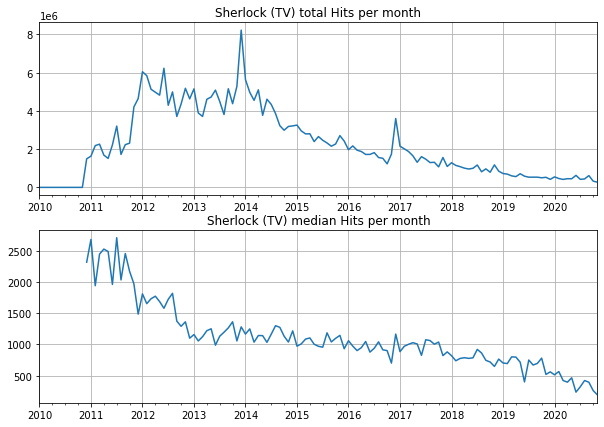

In [158]:
feildName = 'Hits'
months = pd.Series(pd.date_range("2010-01-01", "2021-01-01", freq="M"))
df_stats = ao3.timeStats_numeric(df_set,months,feildName)
print(df_stats.columns)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(211)
df_stats['Total_' + feildName].plot(ax = ax)
plt.title(DB_name + ' total ' + feildName + ' per month')
plt.grid()

ax = fig.add_subplot(212)
df_stats['Median_' + feildName].plot(ax = ax)
plt.title(DB_name + ' median ' + feildName + ' per month')
plt.grid()

plt.savefig(DB_name + '_monthly_'+ feildName + '_AO3.png')
plt.show()

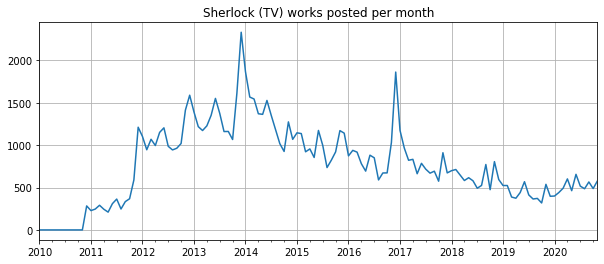

In [151]:
 # try this with only single chapter works?
fig = plt.figure(figsize=(10,4))
df_stats['Work_Counts'].plot()
plt.title(DB_name + ' works posted per month')
plt.grid()
plt.savefig(DB_name + '_monthly_works_AO3.png')

plt.show()

Index(['Work_Counts', 'Unique_Count_Tags', 'Unique_Tags', 'Mean_Count_Tags',
       'New_Count_Tags', 'New_Tags'],
      dtype='object')


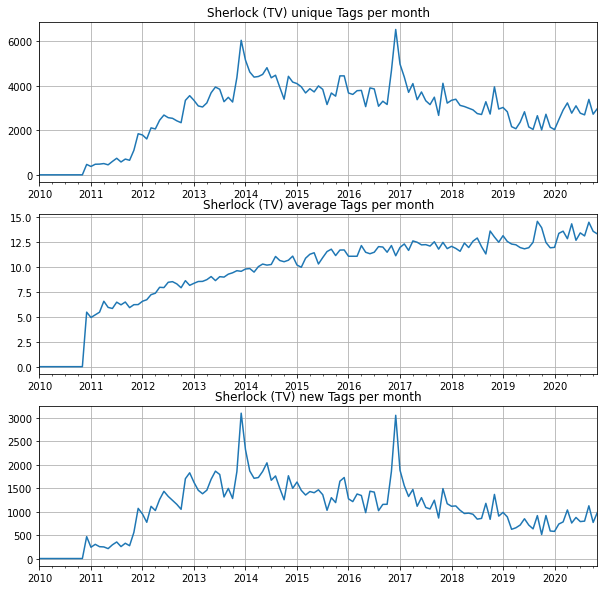

2020-01-31    [(Mención) El Sabueso de Baskerville, (Mención...
2020-02-29    [#HappyBirthdayAlice2020, (Como-Mutantes), (Ev...
2020-03-31    [!למען המדע, (I mean I don't think it's actual...
2020-04-30    [!!!!!!!!!!!!!!!, #TheSortingHatIsAlwaysRight,...
2020-05-31    [(kind of/not really), (not Sherlock/Jim), (th...
2020-06-30    ["No soy puto" dijo el Will Graham, #Johonoloc...
2020-07-31    [(Hinted at too), (its implied but its what i ...
2020-08-31    ["stay with me", &gt;700 words, (Optional) Gav...
2020-09-30    ["What if..", "don't move", #JohnWatson #Sherl...
2020-10-31    [#kiss, (and they were soulmates - omg they we...
2020-11-30    [#pandemicweek, #tydzienpandemiczny, (Flashbac...
Name: New_Tags, dtype: object

In [165]:
months = pd.Series(pd.date_range("2010-01-01", "2021-01-01", freq="M"))
feildName = 'Tags'
df_stats = ao3.timeStats_list(df_set,months,feildName)
print(df_stats.columns)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(311)
df_stats['Unique_Count_' + feildName].plot(ax = ax)
plt.title(DB_name + ' unique ' + feildName + ' per month')
plt.grid()

ax = fig.add_subplot(312)
df_stats['Mean_Count_' + feildName].plot(ax = ax)
plt.title(DB_name + ' average ' + feildName + ' per month')
plt.grid()

ax = fig.add_subplot(313)
df_stats['New_Count_' + feildName].plot(ax = ax)
plt.title(DB_name + ' new ' + feildName + ' per month')
plt.grid()

plt.savefig(DB_name + '_monthly_'+ feildName + '_AO3.png')
plt.show()
df_stats['New_' + feildName].loc["2020-01-01":]

In [163]:
print(df_stats.columns)

Index(['Work_Counts', 'Unique_Count_Creator', 'Unique_Creator',
       'Mean_Count_Creator', 'New_Count_Creator', 'New_Creator'],
      dtype='object')


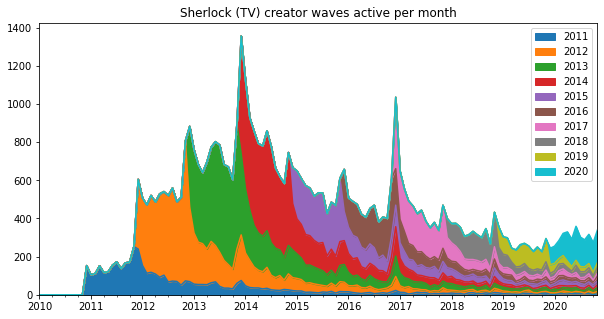

In [164]:
# make wave counts
feildName = 'Creator'
yearSeries = pd.Series(pd.date_range("2010-06-01", "2021-01-01", freq="Y")) 
df_years = ao3.timeStats_list(df_set,yearSeries,feildName)

months = pd.Series(pd.date_range("2010-01-01", "2021-01-01", freq="M"))
df_months = ao3.timeStats_list(df_set,months,feildName)

df_waves = pd.DataFrame(index = df_months.index)

for i in range(len(df_years)):
    c = np.zeros(len(df_months))
    for j in range(len(df_months)):
        c[j]=len(np.intersect1d(df_years.New_Creator.iloc[i],df_months.Unique_Creator.iloc[j]))
    df_waves[df_years.index[i].year + 1] = c

#fig = plt.figure(figsize=(10,5))
df_waves.plot.area(figsize=(10,5))  
plt.title(DB_name + ' creator waves active per month')
plt.legend
plt.savefig(DB_name + '_Annual_CreatorWaves_MonthlyActive_AO3.png')

plt.show()


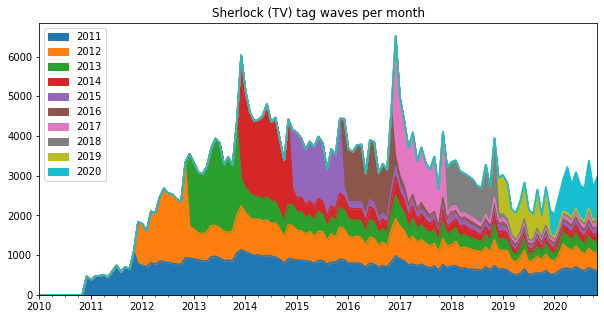

In [167]:
# make wave counts
feildName = 'Tags'
yearSeries = pd.Series(pd.date_range("2010-06-01", "2021-01-01", freq="Y")) 
df_years = ao3.timeStats_list(df_set,yearSeries,feildName)

months = pd.Series(pd.date_range("2010-01-01", "2021-01-01", freq="M"))
df_months = ao3.timeStats_list(df_set,months,feildName)

df_waves = pd.DataFrame(index = df_months.index)

for i in range(len(df_years)):
    c = np.zeros(len(df_months))
    for j in range(len(df_months)):
        c[j]=len(np.intersect1d(df_years.New_Tags.iloc[i],df_months.Unique_Tags.iloc[j]))
    df_waves[df_years.index[i].year + 1] = c

#fig = plt.figure(figsize=(10,5))
df_waves.plot.area(figsize=(10,5))  
plt.title(DB_name + ' tag waves per month')
plt.legend
plt.savefig(DB_name + '_Annual_TagWaves_Monthly_AO3.png')

plt.show()


In [182]:
last_tags = df_years.Unique_Tags.iloc[len(df_years)-1]
c = []
yr_ind = []
for i in range(len(df_years)):
    legacy_tags = np.intersect1d(df_years.New_Tags.iloc[i],last_tags)
    c.append([legacy_tags])
    yr_ind.append(df_years.index[i].year + 1)

tag_instersects = pd.DataFrame(index = yr_ind, data = c)

for index,row in tag_instersects.iterrows():
    print(str(index) + ': ' + str(len(row[0])))
    print(row[0][:10])
    
    filename = DB_name + '_' + str(index) + '_Legacy_tags_in_2020.csv' 
    np.savetxt(filename, row[0], delimiter=",", fmt='%s')


2011: 1531
['(a little bit)' '1950s' '221B Baker Street' '221B Ficlet' '221b' '5 + 1'
 '5 Things' '5+1' '5+1 Things' '69 (Sex Position)']
2012: 2122
['(but not really)' '(sort of)' '00Q - Freeform' '12DaysofMoony'
 '221b challenge' '5 Times' '? - Freeform' 'A Bit of Fluff' 'A cameo'
 'A culprit']
2013: 1548
['(a bit)' '(mentioned)' '1970s' '1990s' '221b Ficlets'
 '30 Day OTP Challenge' '4+1' '50 Sentences' '??? - Freeform'
 'A LOT of Angst']
2014: 1213
['"The Other One" (Sherlock)' '(Almost)' '(hinted at)' '(so does Lacuna)'
 '18th Century' '1920s' '2nd person POV' ':)' 'A cat' 'ABO']
2015: 659
['(very light) BDSM elements' '12 Days of Christmas' '1895' '1980s'
 '2015 - Freeform' '30 Days of Writing'
 'A Bit Mystery Science Theater 3000' 'Abigail Holmes'
 'Absolutely no cannibalism' 'Actor Sherlock']
2016: 479
['(in more ways than one)' '00 Agent(s) (James Bond)' 'Abigail Hobbs'
 'Accidental meeting' 'Adam Lambert' 'Adorable Hamish Watson-Holmes'
 'Alex Turner (London Spy)' 'Alice in W

# Patterns by Tag

In [96]:
# extract a subset of works by the inclusion of a specific tag

Main_Tag = 'Sherlock Holmes/John Watson'

Alternative_Tags = ['Sherlock Holmes/John Watson','Johnlock','Sherlock/John','John/Sherlock','John Watson/Sherlock Holmes']
# I could get the full list of alternatives, but we are working with the relationship tag feild here so. 



In [99]:
# the number of unique creators
flatTagList = ao3.flatten(list(df_set['Relationship_tags'].values))
Cs = pd.Series(data=flatTagList).value_counts()
print('Total number of relationship tags in ' + DB_name + ': ' + str(len(Cs)))
Cs[:20]

Total number of relationship tags in Sherlock (TV): 8553


Sherlock Holmes/John Watson         47595
Sherlock Holmes & John Watson       13882
Mycroft Holmes/Greg Lestrade         8163
Sherlock Holmes/Molly Hooper         7420
Mary Morstan/John Watson             3547
Sebastian Moran/Jim Moriarty         2809
Mycroft Holmes & Sherlock Holmes     1949
Sherlock Holmes & Molly Hooper       1588
Sherlock Holmes/Jim Moriarty         1474
Sherlock Holmes/Greg Lestrade        1275
Mycroft Holmes/Sherlock Holmes       1205
Johnlock                             1047
Irene Adler/Sherlock Holmes           947
Molly Hooper/Sherlock Holmes          934
Mycroft Holmes & Greg Lestrade        768
Molly Hooper/Greg Lestrade            736
Mycroft Holmes/Lestrade               698
Sherlock Holmes & Greg Lestrade       656
Mycroft Holmes/John Watson            579
Sebastian Moran/James Moriarty        517
dtype: int64

In [97]:
Work_Tags = df_set['Relationship_tags']
df_tagged = pd.DataFrame()

for row in df_set.iterrows():
    Tags = row[1].Relationship_tags
    if len(list(set(Alternative_Tags).intersection(Tags)))>0:
        df_tagged = df_tagged.append(df_set.loc[row[0]])
print(len(df_tagged))

48344


In [98]:
df_tagged

,Bookmarks,Category,Chapters,Character_tags,Collection,Comments,Complete,Creator,Date,Fandom,...,Series,Series_part,Summary,Tags,Title,Warning,Words,cURL,sURL,url
2,0.0,[M/M],"[1, 1]","[Sherlock Holmes, John Watson, Mycroft Holmes,...",0,0.0,Complete Work,[fantasybean],2020-12-27,"[Sherlock (TV), Sherlock Holmes & Related Fand...",...,[12 Days of Sherlockmas!],[10],Sherlock and John get caught under the mistlet...,"[Sherlock Holmes/John Watson, Sherlock Holmes,...",Day 10: Underneath the Mistletoe,[No Archive Warnings Apply],1249.0,[https://archiveofourown.org/users/fantasybean...,[https://archiveofourown.org/series/2036677],https://archiveofourown.org/works/28364676
12,0.0,[M/M],"[1, 1]","[Sherlock Holmes, John Watson]",0,2.0,Complete Work,[kindsherlock],2020-12-27,"[Sherlock (TV), Sherlock Holmes & Related Fand...",...,[],[],"John get's hurt during a case, Sherlock freaks...","[Sherlock Holmes/John Watson, Sherlock Holmes ...",Wounds,[Choose Not To Use Archive Warnings],1065.0,[https://archiveofourown.org/users/kindsherloc...,[],https://archiveofourown.org/works/28362630
20,2.0,[M/M],"[1, 1]","[Sherlock Holmes, John Watson, Mrs. Hudson (Sh...",0,2.0,Complete Work,[delightful_fear],2020-12-27,[Sherlock (TV)],...,[],[],Fluffy winter goodness... John and Sherlock fi...,"[Sherlock Holmes/John Watson, Sherlock Holmes,...",Let It Snow,[No Archive Warnings Apply],3299.0,[https://archiveofourown.org/users/delightful_...,[],https://archiveofourown.org/works/28351749
27,2.0,[M/M],"[1, 1]","[Sherlock Holmes, John Watson, Mycroft Holmes,...",1,0.0,Complete Work,[Imjohnlocked87],2020-12-27,"[Sherlock (TV), Sherlock Holmes & Related Fand...",...,[],[],John invites the woman he has been dating the ...,"[Sherlock Holmes & John Watson, Sherlock Holme...",This is the season to be jealous,[Choose Not To Use Archive Warnings],11982.0,[https://archiveofourown.org/users/Imjohnlocke...,[],https://archiveofourown.org/works/28358664
35,1.0,[No category],"[1, 1]","[Sherlock Holmes, John Watson, Greg Lestrade]",0,2.0,Complete Work,[The_Cool_Aunt],2020-12-27,"[Sherlock (TV), Sherlock Holmes & Related Fand...",...,[Endpoint],[13],Harrods. Come at once if convenient. If inconv...,"[Sherlock Holmes/John Watson, Sherlock Holmes,...",Could Be Dangerous—But Festive,[Choose Not To Use Archive Warnings],3818.0,[https://archiveofourown.org/users/The_Cool_Au...,[https://archiveofourown.org/series/253966],https://archiveofourown.org/works/28355049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116364,27.0,[M/M],"[1, 1]","[Sherlock Holmes, John Watson]",0,11.0,Complete Work,[f_m_r_l],2011-01-01,[Sherlock (TV)],...,[],[],Sherlock sets a personal goal.\n,"[Sherlock Holmes/John Watson, Sherlock Holmes,...",By Any Other Name,[No Archive Warnings Apply],2892.0,[https://archiveofourown.org/users/f_m_r_l/pse...,[],https://archiveofourown.org/works/454972
116368,26.0,[M/M],"[1, 1]","[John Watson, Sherlock Holmes]",0,7.0,Complete Work,[tocourtdisaster],2011-01-01,[Sherlock (TV)],...,[],[],People flirt with Sherlock all the time; it's ...,"[Sherlock Holmes/John Watson, John Watson, She...",Long and seek after,[No Archive Warnings Apply],1241.0,[https://archiveofourown.org/users/tocourtdisa...,[],https://archiveofourown.org/works/283223
116370,165.0,[M/M],"[1, 1]","[Sherlock Holmes, John Watson]",1,41.0,Complete Work,[lavvyan],2011-01-01,"[Sherlock (TV), Sherlock Holmes & Related Fand...",...,[],[],The third time Sherlock gets himself kidnappe...,"[Sherlock Holmes/John Watson, Sherlock Holmes,...","The World in My Pocket, the Sky in My Handkerc...",[Graphic Depictions Of Violence],1766.0,[https://archiveofourown.org/users/lavvyan/pse...,[],https://archiveofourown.org/works/146829
116375,1.0,[M/M],"[1, 1]","[Sherlock Holmes, John Watson]",0,0.0,Complete Work,[orphan_account],2011-01-01,[Sherlock (TV)],...,[],[],A quick drawing of Sherlock kissing John's for...,"[Sherlock Holmes/John Watson, Sherlock Holmes,...",Forehead Kiss,[No Archiv

In [67]:
Main_Tag = 'Mycroft Holmes/Greg Lestrade'
Main_Tag in Work_Tags[10]

True

In [66]:
Work_Tags[10]

['Mycroft Holmes/Greg Lestrade',
 'Harry Hart | Galahad/Mycroft Holmes',
 'Harry Hart | Galahad/Greg Lestrade',
 'Harry Hart | Galahad/Mycroft Holmes/Greg Lestrade']

In [55]:
# the number of unique creators
flatTagList = ao3.flatten(list(df_DB['Character_tags'].values))
Cs = pd.Series(data=flatTagList).value_counts()
print('Total number of Character tags in ' + DB_name + ': ' + str(len(Cs)))
Cs[:20]

Total number of Character tags in Sherlock (TV): 17793


Sherlock Holmes                  90411
John Watson                      77827
Mycroft Holmes                   35431
Greg Lestrade                    29040
Molly Hooper                     19028
Jim Moriarty                     11695
Mary Morstan                      7966
Mrs. Hudson                       7056
Sally Donovan                     6368
Sebastian Moran                   6365
Anthea (Sherlock)                 4058
Mrs. Hudson (Sherlock Holmes)     3932
Irene Adler                       3824
Harry Watson                      2678
Mike Stamford                     2418
Rosamund Mary "Rosie" Watson      2335
Mummy (Sherlock)                  2292
Original Female Character(s)      2220
Philip Anderson                   2119
James Moriarty                    2090
dtype: int64